## Homework #3. Crowdsourcing tools review
#### Author: `<Nikita> <Savenko>`
#### Total time spent on h/w (in minutes): `<300>`

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
DIALOGS_MERGED_DATA_PATH = "F:/DS naukma/data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "F:/DS naukma/data/merged_data/dialogs_users_all.csv"

In [5]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Task 2.1
## Messages data analysis

In [41]:
df.head(5)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
0,1397,2022-02-21 19:00:12+00:00,NaN,PeerChannel(channel_id=1073261085),"MessageFwdHeader(date=datetime.datetime(2022, ...",🔺Любиш-піди! Спудейський вісник №4 \n\nПередос...,photo,NaN,-1001073261085
1,1396,2022-02-21 18:36:27+00:00,NaN,PeerChannel(channel_id=1073261085),NaN,💣 Офлайн-засідання дебатного клубу\n\n23.02.22...,photo,NaN,-1001073261085
2,1395,2022-02-21 13:42:38+00:00,NaN,PeerChannel(channel_id=1073261085),NaN,🚇 На станції метро «Контрактова площа» 23 люто...,text,NaN,-1001073261085
3,1394,2022-02-18 19:05:37+00:00,NaN,PeerChannel(channel_id=1073261085),NaN,"📸 Відбудеться ""Фотолюбов НаУКМА""\n\n19.02.22 (...",photo,NaN,-1001073261085
4,1393,2022-02-17 11:30:32+00:00,NaN,PeerChannel(channel_id=1073261085),NaN,👥 Набір в Асоціацію студентів політологів \n\...,photo,NaN,-1001073261085


In [5]:
df.shape

(421288, 9)

In [6]:
min(df["date"]),max(df["date"])

('2017-10-17 13:54:19+00:00', '2022-02-22 09:16:53+00:00')

In [7]:
df.groupby(["type"])["type"].count()

type
photo       23572
sticker     12767
text       374864
video        7549
voice        2536
Name: type, dtype: int64

In [8]:
df.groupby(["type"])["duration"].sum()

type
photo           0.0
sticker         0.0
text            0.0
video      453362.0
voice       52255.0
Name: duration, dtype: float64

## Tasks to do:

1. Define your telegram ID (https://www.alphr.com/telegram-find-user-id/).

In [9]:
my_id = 419413633

2. Check on examples that the data you downloaded reflects your telegram messages. Make screenshots (insert your screenshots in this notebook) of 3 different messages in TG and related rows in your dataset here.

In [10]:
df[df['from_id'].str.contains(str(my_id), na = False)].sort_values(by='date', ascending=False)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
390503,218219,2022-02-22 08:55:29+00:00,PeerUser(user_id=419413633),387335969,NaN,го,text,NaN,387335969
390506,218216,2022-02-22 08:55:19+00:00,PeerUser(user_id=419413633),387335969,NaN,у меня они в папку уже выкачались,text,NaN,387335969
390507,218215,2022-02-22 08:54:57+00:00,PeerUser(user_id=419413633),387335969,NaN,NaN,photo,NaN,387335969
390511,218211,2022-02-22 08:53:49+00:00,PeerUser(user_id=419413633),387335969,NaN,А это норм что у меня диалоги все за минуту вы...,text,NaN,387335969
390512,218210,2022-02-22 08:53:35+00:00,PeerUser(user_id=419413633),387335969,NaN,Сань,text,NaN,387335969
...,...,...,...,...,...,...,...,...,...
392146,5,2018-01-22 19:28:29+00:00,PeerUser(user_id=419413633),422835276,NaN,NaN,photo,NaN,422835276
392148,3,2018-01-22 19:28:29+00:00,PeerUser(user_id=419413633),422835276,NaN,NaN,photo,NaN,422835276
392149,2,2018-01-22 19:28:29+00:00,PeerUser(user_id=419413633),422835276,NaN,NaN,photo,NaN,422835276
392150,1,2018-01-22 19:28:29+00:00,PeerUser(user_id=419413633),422835276,NaN,NaN,photo,NaN,422835276


In [49]:
df['date'] = pd.to_datetime(df.date)

In [50]:
df.dtypes

id                         int64
date         datetime64[ns, UTC]
from_id                   object
to_id                     object
fwd_from                  object
message                   object
type                      object
duration                 float64
dialog_id                  int64
dtype: object

In [121]:
df.date.dt.dayofweek

0            Monday
1            Monday
2            Monday
3            Friday
4          Thursday
            ...    
421283      Tuesday
421284     Thursday
421285      Tuesday
421286    Wednesday
421287    Wednesday
Name: date, Length: 421288, dtype: object

In [127]:
df['day_of_week'] = df['date'].dt.dayofweek

In [138]:
df.head(5)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id,day_of_week
0,1397,2022-02-21 19:00:12+00:00,NaN,PeerChannel(channel_id=1073261085),"MessageFwdHeader(date=datetime.datetime(2022, ...",🔺Любиш-піди! Спудейський вісник №4 \n\nПередос...,photo,NaN,-1001073261085,0
1,1396,2022-02-21 18:36:27+00:00,NaN,PeerChannel(channel_id=1073261085),NaN,💣 Офлайн-засідання дебатного клубу\n\n23.02.22...,photo,NaN,-1001073261085,0
2,1395,2022-02-21 13:42:38+00:00,NaN,PeerChannel(channel_id=1073261085),NaN,🚇 На станції метро «Контрактова площа» 23 люто...,text,NaN,-1001073261085,0
3,1394,2022-02-18 19:05:37+00:00,NaN,PeerChannel(channel_id=1073261085),NaN,"📸 Відбудеться ""Фотолюбов НаУКМА""\n\n19.02.22 (...",photo,NaN,-1001073261085,4
4,1393,2022-02-17 11:30:32+00:00,NaN,PeerChannel(channel_id=1073261085),NaN,👥 Набір в Асоціацію студентів політологів \n\...,photo,NaN,-1001073261085,3


In [12]:
len(df['dialog_id'].unique())

212

3. Find the longest audio message you've ever sent; what's its duration? Make its screenshot (insert your screenshots in this notebook).

In [13]:
df[df['from_id'].str.contains(str(my_id), na = False)&(df['type']=='voice') ].sort_values(by='duration', ascending=False).head(1)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
308770,191869,2021-12-04 10:56:32+00:00,PeerUser(user_id=419413633),PeerChat(chat_id=468401756),"MessageFwdHeader(date=datetime.datetime(2021, ...",Про Антона Птушкина\n\n#Подкаст,voice,765.0,-468401756


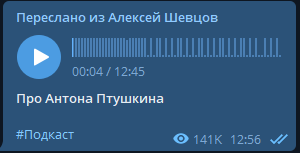

4. Calculate numbers of send and received(s&r) messages.

In [14]:
my_messages = df[(df['from_id'] == my_id) | (df['to_id'] == my_id)]
received_messages = len(df[(df['to_id'] == my_id)])
send_messages = len(df[(df['from_id'] == "PeerUser(user_id=419413633)")])

In [15]:
my_messages.shape[0]

13955

In [16]:
received_messages

13955

In [17]:
send_messages

56668

5. Draw number of send and received(s&r) messages per day (x-axis - is date(from min(date) till max(date)), y-axis number of messages). There should be two lines: blue for received red for send.

In [18]:
my_messages['sended'] = np.where(my_messages['from_id'] == my_id, 1, 0)
my_messages['recieved'] = 1-my_messages['sended']
my_messages_stat = my_messages.groupby('date', as_index=False)[['sended', 'recieved']].sum()
my_messages_stat

C:\Users\Admin\AppData\Local\Temp/ipykernel_12632/333339145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_messages['sended'] = np.where(my_messages['from_id'] == my_id, 1, 0)
C:\Users\Admin\AppData\Local\Temp/ipykernel_12632/333339145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_messages['recieved'] = 1-my_messages['sended']


,date,sended,recieved
0,2018-05-28 05:41:27+00:00,0,1
1,2018-05-28 07:17:23+00:00,0,1
2,2018-05-28 07:17:28+00:00,0,1
3,2018-05-28 07:17:45+00:00,0,1
4,2018-05-28 07:18:00+00:00,0,1
...,...,...,...
13465,2022-02-21 13:11:53+00:00,0,1
13466,2022-02-21 21:44:29+00:00,0,1
13467,2022-02-21 21:44:41+00:00,0,1
13468,2022-02-21 21:44:46+00:00,0,1


6. Draw a few diagrams to show distributions between post types in the time, a diagram showing the total amount of messages of each type.

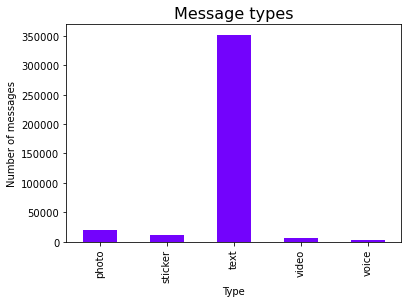

In [227]:
df.groupby('type')['date'].nunique().plot(kind='bar', color = '#7303fc')
plt.ylabel('Number of messages')
plt.xlabel('Type')
plt.title('Message types', fontsize=16)
plt.show()


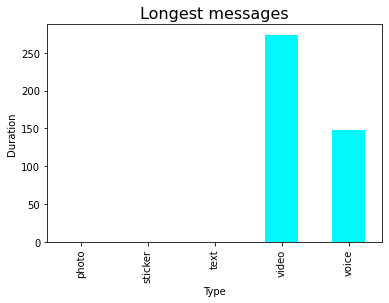

In [228]:
df.groupby('type')['duration'].nunique().plot(kind='bar', color = '#03f8fc')
plt.ylabel('Duration')
plt.xlabel('Type')
plt.title('Longest messages', fontsize=16)
plt.show()


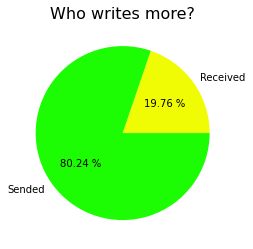

In [229]:
labels = ['Received', 'Sended']
colors = ['#f0fc03', '#1cfc03']
plt.pie([received_messages, send_messages], labels=labels, colors=colors, autopct='%.2f %%')
plt.title('Who writes more?', fontsize=16)
plt.show()

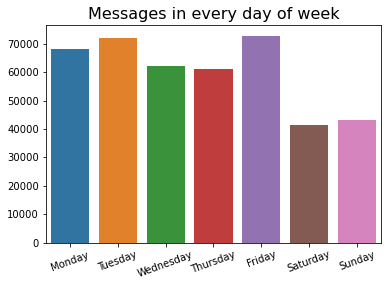

In [230]:
Monday = df[df['day_of_week'] == 0].count()['id']
Tuesday = df[df['day_of_week'] == 1].count()['id']
Wednesday = df[df['day_of_week'] == 2].count()['id']
Thursday = df[df['day_of_week'] == 3].count()['id']
Friday = df[df['day_of_week'] == 4].count()['id']
Saturday = df[df['day_of_week'] == 5].count()['id']
Sunday = df[df['day_of_week'] == 6].count()['id']
Week = [Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday]
WeekName = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax = sns.barplot(y = Week, x = WeekName)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
plt.title('Messages in every day of week', fontsize=16)
plt.show()

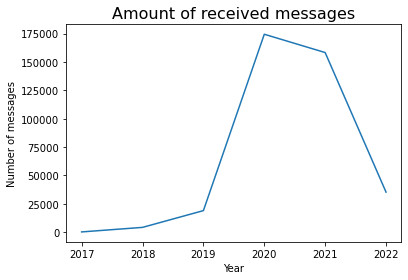

In [231]:
df.groupby(df.date.dt.year)['message'].count().plot()
plt.ylabel('Number of messages')
plt.xlabel('Year')
plt.title('Amount of received messages', fontsize=16)
plt.show()


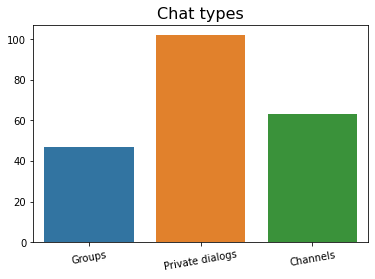

In [28]:
all = len(df['dialog_id'].unique())
groups = df_meta[df_meta['type']=='Group'].groupby('dialog_id', as_index=False).first().shape[0]
private_dialogs = df_meta[df_meta['type']=='Private dialog'].groupby('dialog_id', as_index=False).first().shape[0]
channels = all - group - private_dialogs
types = [groups, private_dialogs, channels]
typesName = ['Groups','Private dialogs','Channels']
ax = sns.barplot(y = types, x = typesName)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 10)
plt.title('Chat types', fontsize=16)
plt.show()

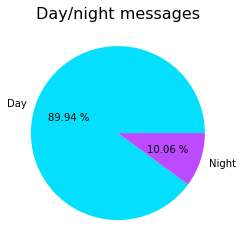

In [232]:
Night = df[(df['date'].dt.hour>=22) | (df['date'].dt.hour<=4)].count()['date']
Day = df.count()['date']-Night
Labels = ['Day','Night']
Colors = ['#03dffc','#BC4AFE']
plt.pie([Day,Night],labels = Labels,colors = Colors, autopct = '%.2f %%')
plt.title('Day/night messages', fontsize=16)
plt.show()

7. Calculate top-10 people to whom you wrote the biggest amount of messages (name, amount of messages).

In [233]:
i_sended = df[df['from_id'].str.contains('419413633', na= False)]
i_sended_stats = i_sended.groupby('to_id', as_index=False)['from_id'].count().rename(columns={'from_id':'amount_of_messages', 'to_id':'dialog_id'})
top10 = df_meta[['dialog_id', 'name']].merge(i_sended_stats, on='dialog_id', how='inner').sort_values(by='amount_of_messages', ascending=False).iloc[:10, 1:]


<function matplotlib.pyplot.show(close=None, block=None)>

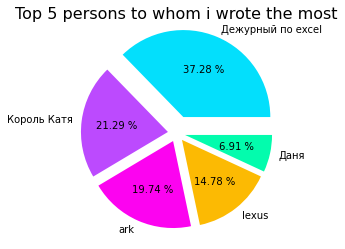

In [226]:
top1 = top10.iloc[0].amount_of_messages
top2 = top10.iloc[1].amount_of_messages
top3 = top10.iloc[2].amount_of_messages
top4 = top10.iloc[3].amount_of_messages
top5 = top10.iloc[4].amount_of_messages
people = [top1, top2, top3, top4, top5]
colors = ['#03dffc','#BC4AFE', '#fc03f0', '#fcba03', '#03fcad']
labels = ['Дежурный по excel', 'Король Катя', 'ark', 'lexus', 'Даня']
explode = (.2,.1,.1,.1,.1)
plt.pie(people, labels=labels, colors=colors, autopct = '%.2f %%', pctdistance=0.6, explode=explode)
plt.title('Top 5 persons to whom i wrote the most', fontsize=16)
plt.show

8. Calculate top-10 people who wrote the biggest amount of messages to you (name, amount of messages).

## Task 2.2
## Dialogs data analysis

In [6]:
df_meta.shape

(962, 4)

In [29]:
df_meta[df_meta['type']=='Private dialog'].groupby('dialog_id', as_index=False).first().shape[0]

102

In [22]:
df_meta[df_meta['name']=='Алексей Шевцов']

,dialog_id,name,type,users


In [23]:
df[df['message']=='Фух, гайсы, наконец-то провел свой первый стрим на Твиче! Было кринжово, но весело, пару тиктоков реально вынесли. В целом ни кого не угнетнули, потому получилось норм.']

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
3280,1253,2022-02-15 14:16:59+00:00,NaN,PeerChannel(channel_id=1158535533),NaN,"Фух, гайсы, наконец-то провел свой первый стри...",photo,NaN,-1001158535533
346890,215680,2022-02-15 14:20:52+00:00,PeerUser(user_id=419413633),371105962,"MessageFwdHeader(date=datetime.datetime(2022, ...","Фух, гайсы, наконец-то провел свой первый стри...",photo,NaN,371105962


In [24]:
df_meta[df_meta['dialog_id']==371105962]

,dialog_id,name,type,users
891,371105962,Тим,Private dialog,"{'user_id': 371105962, 'first_name': 'Тим', 'l..."


In [23]:
df_meta.head(10)

,dialog_id,name,type,users
0,-1001172475464,ZXC тусовка (играем на публику с колонкой Некита),Group,"{'user_id': 855734991, 'first_name': 'Богдан',..."
1,-1001172475464,ZXC тусовка (играем на публику с колонкой Некита),Group,"{'user_id': 497713871, 'first_name': 'Богдан',..."
2,-1001172475464,ZXC тусовка (играем на публику с колонкой Некита),Group,"{'user_id': 508018772, 'first_name': 'lexus', ..."
3,-1001172475464,ZXC тусовка (играем на публику с колонкой Некита),Group,"{'user_id': 716096216, 'first_name': 'ark', 'l..."
4,-1001172475464,ZXC тусовка (играем на публику с колонкой Некита),Group,"{'user_id': 387335969, 'first_name': 'Олександ..."
5,-1001172475464,ZXC тусовка (играем на публику с колонкой Некита),Group,"{'user_id': 419413633, 'first_name': 'Никита',..."
6,-1001228529852,Suorin Доставки,Group,"{'user_id': 144810426, 'first_name': 'Даня', '..."
7,-1001228529852,Suorin Доставки,Group,"{'user_id': 419413633, 'first_name': 'Никита',..."
8,-1001235499976,"Группа 3,4 Киря",Group,"{'user_id': 409349016, 'first_name': 'Марічка🐸..."
9,-1001235499976,"Группа 3,4 Киря",Group,"{'user_id': 544639169, 'first_name': 'natasha'..."


In [16]:
df_meta.groupby(["type"])["type"].count()

type
Group             860
Private dialog    102
Name: type, dtype: int64

## Tasks to do:

1. Find our TG group. Print its id and list of participants.

In [25]:
my_group = df_meta[df_meta['name'].str.contains('CSS_01_2022_KMA')].reset_index(drop=True)
my_group['users'] = my_group['users'].apply(lambda x: eval(x))
list_users = my_group['users'].apply(lambda x: [x['first_name'] , x['username']]).to_list()
print({'my_tg_group_id': my_group['dialog_id'].unique()[0], 'users': list_users})

{'my_tg_group_id': -1001787503050, 'users': [['Олександр Верещак', 'Bench_S'], ['Andrew', 'SanGreel'], ['Alex', 'just_me_alex'], ['Тим', 'bellatorio'], ['Король', 'cutebutpsychooo'], ['yyuuuurrrrrrraaaaaa', 'antianti06'], ['Ярослав', 'kushyndra'], ['Богдан', 'Bhurskyy'], ['ARINA', 'darlingvillain'], ['Андрей', 'Andrey_Khoptiy'], ['Влад', 'Vladon32'], ['Куземко', 'yasyakuzya'], ['Liza Andrych', 'liza_andrych'], ['Aleksandr', 'averkin_aleksandrr'], ['Анастасия', 'kryzhikk'], ['natasha', 'nnattashaaaa'], ['∆аша', 'dosshhhik'], ['anhelina', 'br00klynbaby'], ['маша', 'mostovama'], ['Egor', 'bolotovyehor'], ['Олег', 'Qrannik'], ['ark', 'arkahahaker'], ['Bohdan', 'bohdan_romanchuk'], ['Роман', 'roterentiev'], ['Cristina', 'cristiiina'], ['Petro.maliuk@wze_w_drova', 'Petro_king_of_tsygans'], ['Арсен', 'arsen_doinychko'], ['Yullya', 'VerbikYullya'], ['Богдан', 'el_beasto'], ['iva', 'Niva228'], ['Ana.sta.sia', 'aana_sta_siaa'], ['Yuliia', 'datulka'], ['Vlaad', 'vladkoval03'], ['Masha', 'daisyy_f

2. Draw distribution of group sizes.

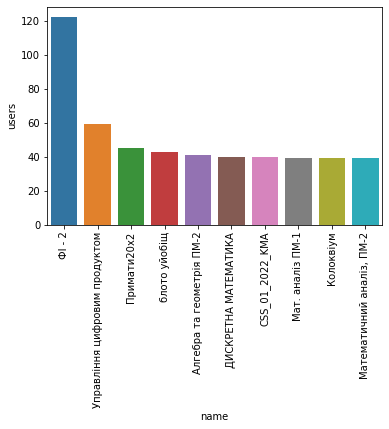

In [26]:
groups = df_meta[df_meta['type'] == 'Group']
groups_stat = groups.groupby('name', as_index=False)['users'].count()
groups_stat = groups_stat.merge(groups[['name']], on='name', how='inner').groupby('name', as_index=False).last()
groups_stat = groups_stat.sort_values(by='users', ascending=False).iloc[:10]
groups_stat['name'] = groups_stat['name'].astype('str')

sns.barplot(x=groups_stat['name'], y=groups_stat['users'],)
plt.xticks(rotation=90)
plt.show()

3. Calculate top-10 the biggest groups/channels.

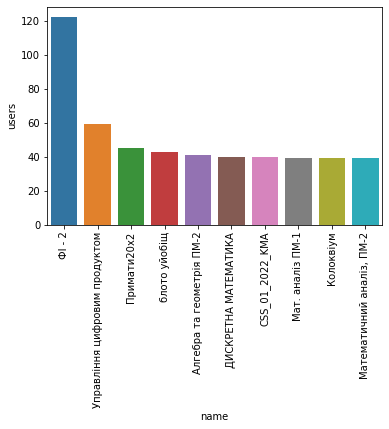

In [27]:
groups_chanels = df_meta[(df_meta['type'] == 'Group') | (df_meta['type'] == 'Channel')]
groups_chanels_stat = groups_chanels.groupby('name', as_index=False)['users'].count()
groups_chanels_stat = groups_chanels_stat.merge(groups_chanels[['name']], on='name', how='inner').groupby('name', as_index=False).last()
groups_chanels_stat = groups_chanels_stat.sort_values(by='users', ascending=False).iloc[:10]
groups_chanels_stat['name'] = groups_chanels_stat['name'].astype('str')

sns.barplot(x=groups_chanels_stat['name'], y=groups_chanels_stat['users'],)
plt.xticks(rotation=90)
plt.show()

4. Calculate the number of distinct user names you are connected to through any type of dialogue.

In [28]:
len(df_meta['users'].unique())

325